In [30]:
import numpy as np
import matplotlib.pyplot as plt


def phi(f,R=2, delta=1/6):
    return -1/(1+abs(f))+(R*delta)/(delta+abs(f))

def lambda_f(f, lambda_):
    return f*lambda_


In [31]:
import sympy as sp

def eq_points(lambda_val, R = 2, delta = 1/6):
    f = sp.symbols('f')  

    eq1= sp.Eq(lambda_val * f, R * delta / (delta - f) - 1 / (1 - f))

    eq2 = sp.Eq(lambda_val * f, R * delta / (delta + f) - 1 / (1 + f))

    sol1 = sp.solve(eq1, f)
    sol2 = sp.solve(eq2, f)

    sol_re = [sp.re(i) for i in sol1 if sp.re(i) < 0]
    sol_re1 = [i for i in sol2 if i.is_real]
    
    return sol_re, sol_re1


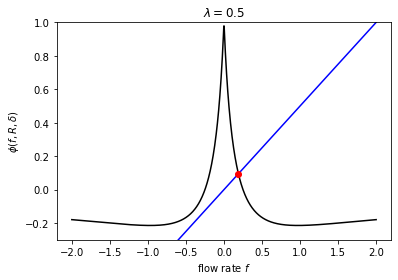

In [32]:

def phi_plot(f):
    plt.plot(f,phi(f), color = 'black')

def lambda_plot(f, lambda_):
    plt.plot(f,lambda_f(f,lambda_), color = 'blue')
    
def intersection_plot(lambda_):
    sol1, sol2 = eq_points(lambda_)
    # if len(sol1) == 0:
    #     return
    if len(sol1) == 1 and (lambda_ > 0.33 and lambda_ < 0.34):
        plt.plot(sol1[0], lambda_f(sol1[0], lambda_), 'o', color = 'red')
    if len(sol1) == 2 and lambda_ < 0.34:
        plt.plot(sol1[0], lambda_f(sol1[0], lambda_), 'o', color = 'red')
        plt.plot(sol1[1], lambda_f(sol1[1], lambda_), 'o', color = 'red')
    if len(sol2) == 1:
        plt.plot(sol2[0], lambda_f(sol2[0], lambda_), 'o', color = 'red')

lambdas = np.linspace(1/6,1/2,300)
f = np.linspace(-2,2,1000)

for lambda_ in lambdas:
    plt.clf()
    plt.ylabel(r'$\phi(f,R,\delta)$', fontsize = 10)
    plt.xlabel(r'flow rate $f$', fontsize = 10)
    phi_plot(f)
    lambda_plot(f,lambda_)
    intersection_plot(lambda_)
    plt.ylim(-0.3,1)
    plt.title(fr'$\lambda = {np.round(lambda_,2)}$')
    plt.savefig(f'phi_plots/phi_plot_{lambda_}.png', dpi = 600)


In [33]:
import imageio
import os

# Get the list of image files in the phi_plots folder
image_files = [file for file in os.listdir('phi_plots') if file.endswith('.png')]

# Sort the image files in ascending order
image_files.sort()

# Create an empty list to store the image frames
frames = []

# Read each image file and append it to the frames list
for image_file in image_files:
    image_path = os.path.join('phi_plots', image_file)
    image = imageio.imread(image_path)
    frames.append(image)

# Save the frames as a movie
output_path = 'phi_plots/phi_movie.mp4'
imageio.mimsave(output_path, frames, fps=23)

print(f"Movie saved successfully at {output_path}")


/var/folders/r2/gzlv5h7s47398gkvjzzqmmfr0000gn/T/ipykernel_20713/3742896856.py:16: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(image_path)


Movie saved successfully at phi_plots/movie.mp4
